In [3]:
import pandas as pd
import os

print("Files in data folder:", os.listdir("../data"))

df = pd.read_excel("../data/Telco_customer_churn.xlsx")
df.head()



Files in data folder: ['Telco_customer_churn.xlsx']


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [5]:
df.isnull().sum()


CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [6]:
# Convert Total Charges to numeric
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

# Check conversion
df['Total Charges'].head()


0     108.15
1     151.65
2     820.50
3    3046.05
4    5036.30
Name: Total Charges, dtype: float64

In [ ]:
df['Total Charges'].isnull().sum()


np.int64(11)

In [ ]:
df.drop(columns=[
    "CustomerID", 
    "Lat Long", 
    "Churn Reason", 
    "Country", 
    "State", 
    "City"
], inplace=True)



In [9]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')
df['Total Charges'].isnull().sum()


np.int64(11)

In [10]:
df.dropna(subset=["Total Charges"], inplace=True)


In [ ]:
df.drop(columns=[
    "CustomerID", 
    "Lat Long", 
    "Churn Reason", 
    "Country", 
    "State", 
    "City"
], inplace=True)


In [12]:
df.columns


Index(['Count', 'Zip Code', 'Latitude', 'Longitude', 'Gender',
       'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV'],
      dtype='object')

In [13]:
df.columns.tolist()


['Count',
 'Zip Code',
 'Latitude',
 'Longitude',
 'Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Tenure Months',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Monthly Charges',
 'Total Charges',
 'Churn Label',
 'Churn Value',
 'Churn Score',
 'CLTV']

In [14]:
df.drop(columns=["Zip Code", "Latitude", "Longitude", "Churn Label"], inplace=True)


In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Count,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,...,Streaming TV_No internet service,Streaming TV_Yes,Streaming Movies_No internet service,Streaming Movies_Yes,Contract_One year,Contract_Two year,Paperless Billing_Yes,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,1,2,53.85,108.15,1,86,3239,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,1,2,70.70,151.65,1,67,2701,False,False,False,...,False,False,False,False,False,False,True,False,True,False
2,1,8,99.65,820.50,1,86,5372,False,False,False,...,False,True,False,True,False,False,True,False,True,False
3,1,28,104.80,3046.05,1,84,5003,False,False,True,...,False,True,False,True,False,False,True,False,True,False
4,1,49,103.70,5036.30,1,89,5340,True,False,False,...,False,True,False,True,False,False,True,False,False,False


In [16]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop("Churn Value", axis=1)   # features
y = df_encoded["Churn Value"]                # target (0/1 churn)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((5625, 33), (1407, 33))

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9317697228144989
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1033
           1       0.88      0.86      0.87       374

    accuracy                           0.93      1407
   macro avg       0.91      0.91      0.91      1407
weighted avg       0.93      0.93      0.93      1407



In [ ]:
import xgboost
xgboost.__version__


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


In [1]:
from xgboost import XGBClassifier
import xgboost
print("XGBoost version:", xgboost.__version__)


XGBoost version: 3.1.2


In [ ]:
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
from sklearn.model_selection import train_test_split

# Target variable
y = df["Churn Value"]

# Features (all columns except target)
X = df.drop(columns=["Churn Value"])


In [ ]:
import pandas as pd

df = pd.read_excel("data/Telco_customer_churn.xlsx")
df.head()


In [5]:
import os
os.getcwd()


'/Users/ravalipatel/Desktop/ChurnPredictionProject/notebooks'

In [6]:
import os
os.listdir("../data")


['Telco_customer_churn.xlsx']

In [7]:
import pandas as pd

df = pd.read_excel("../data/Telco_customer_churn.xlsx")
df.head()


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [8]:
df_clean = df.drop(columns=[
    "CustomerID",
    "Country",
    "State",
    "City",
    "Lat Long",
    "Churn Reason",
    "Zip Code",
    "Latitude",
    "Longitude"
])

df_clean.head()


,Count,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV
0,1,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239
1,1,Female,No,No,Yes,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701
2,1,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372
3,1,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003
4,1,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340


In [9]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)
df_encoded.head()


,Count,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV,Gender_Male,Senior Citizen_Yes,Partner_Yes,Dependents_Yes,...,Total Charges_8529.5,Total Charges_8543.25,Total Charges_8547.15,Total Charges_8564.75,Total Charges_8594.4,Total Charges_8670.1,Total Charges_8672.45,Total Charges_8684.8,Total Charges_,Churn Label_Yes
0,1,2,53.85,1,86,3239,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,1,2,70.70,1,67,2701,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
2,1,8,99.65,1,86,5372,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
3,1,28,104.80,1,84,5003,False,False,True,True,...,False,False,False,False,False,False,False,False,False,True
4,1,49,103.70,1,89,5340,True,False,False,True,...,False,False,False,False,False,False,False,False,False,True


In [10]:
X = df_encoded.drop("Churn Value", axis=1)
y = df_encoded["Churn Value"]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [13]:
df_clean = df.drop(columns=[
    "CustomerID",
    "Country",
    "State",
    "City",
    "Lat Long",
    "Latitude",
    "Longitude",
    "Churn Reason",
    "Churn Score",
    "CLTV",
    "Churn Label"
])


In [14]:
df_encoded = pd.get_dummies(df_clean, drop_first=True)


In [15]:
X = df_encoded.drop("Churn Value", axis=1)
y = df_encoded["Churn Value"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7955997161107168
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1009
           1       0.67      0.55      0.60       400

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [17]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=200, random_state=42)
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

ensemble = VotingClassifier(
    estimators=[
        ('lr', log_reg),
        ('rf', rf),
        ('xgb', xgb)
    ],
    voting='soft'
)

ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)

print("Ensemble Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ensemble Accuracy: 0.8090844570617459
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1009
           1       0.71      0.56      0.62       400

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [19]:
# Train a separate XGBoost model JUST for SHAP
from xgboost import XGBClassifier

xgb_shap = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_shap.fit(X_train, y_train)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


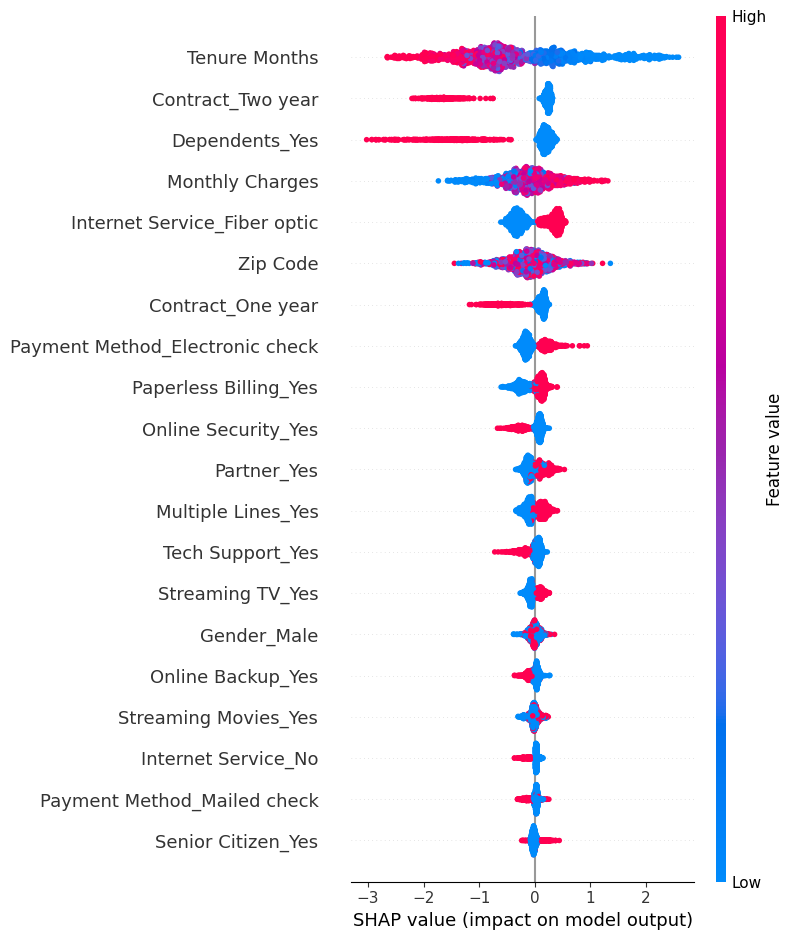

In [20]:
import shap

explainer = shap.TreeExplainer(xgb_shap)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
